## 0. Importación de librerias y carga de datos

In [1]:
!pip install pandas scikit-learn matplotlib seaborn
import pandas as pd
from sklearn import datasets, model_selection, preprocessing, linear_model, metrics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.style.use('ggplot')

  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 11.6/11.6 MB 55.9 MB/s eta 0:00:00
Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 7.8/7.8 MB 68.7 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 62.

In [2]:
df_original = pd.read_csv('Data/202510_Laboratorio 2 - Agrupación_Customer_Data.csv ',sep=';', encoding='ISO-8859-1')
df=df_original.copy()

## 1. Preparación de datos

### 1.1 Perfilamiento de datos

In [3]:
df.shape

(8950, 18)

In [4]:
df

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.072200,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.480040,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.519020,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.570580,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.003840,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.587970,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.021630,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.705070,6994.688474,62041.61734,0.383186,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C18946,6095.221156,0.234346,27094.007820,35917.204380,3463.821376,11711.578890,0.469832,0.539477,0.828321,0.191030,75,101,17623.810280,23954.396950,34841.82989,0.866856,7
8946,C18947,12682.575820,0.686025,38433.618850,5293.541956,18924.799800,34444.867320,0.710331,0.276426,0.546059,0.935152,95,170,12433.814930,7375.625322,66726.37299,0.306600,10
8947,C18948,16464.311410,0.189136,4296.196384,32554.759640,11231.500430,15214.671560,0.424665,0.746010,0.690380,1.063788,51,151,3307.587117,22947.759220,54761.96221,0.129242,8
8948,C18949,15531.883780,0.117118,12219.325650,31795.971700,12390.432130,13856.393210,0.450670,0.805140,0.608737,1.058548,61,178,6148.232910,21369.503520,50368.30906,0.087448,8


El set de datos obtenido tiene 8950 filas y 18 columnas. Cada fila representa una tarjeta de un cliente. La tarjeta está descrita en terminos de los movimientos que el cliente de la empresa realiza con ella. Tenemos información de saldos, compras a plazo, puntuales y totales. Además hay información de pagos, avances en efectivo  y también se conoce el tiempo que la persona lleva siendo cliente de FinanzasAlpes.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   8950 non-null   object 
 1   SALDO                8950 non-null   float64
 2   F_SALDO              8950 non-null   float64
 3   COMPRAS              8950 non-null   float64
 4   COMPRAS_PUNTUALES    8950 non-null   float64
 5   COMPRAS_PLAZOS       8950 non-null   float64
 6   AVANCE_EFECTIVO      8950 non-null   float64
 7   F_COMPRAS            8950 non-null   float64
 8   F_COMPRAS_PUNTUALES  8950 non-null   float64
 9   F_COMPRAS_PLAZOS     8950 non-null   float64
 10  F_AVANCE_EFECTIVO    8950 non-null   float64
 11  P_AVANCE_EFECTIVO    8950 non-null   int64  
 12  P_COMPRAS            8950 non-null   int64  
 13  LÍMITE_CREDITO       8949 non-null   float64
 14  PAGOS                8950 non-null   float64
 15  PAGOS_MINIMOS        8637 non-null   f

In [6]:
for col in df.columns:
    print(df[col].value_counts)

<bound method IndexOpsMixin.value_counts of 0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C18946
8946    C18947
8947    C18948
8948    C18949
8949    C18950
Name: ID, Length: 8950, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        5323.148883
1       12726.638120
2        4305.572068
3        4740.988511
4       13820.920640
            ...     
8945     6095.221156
8946    12682.575820
8947    16464.311410
8948    15531.883780
8949     5852.488566
Name: SALDO, Length: 8950, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       0.250693
1       0.791307
2       0.176531
3       0.178076
4       0.826914
          ...   
8945    0.234346
8946    0.686025
8947    0.189136
8948    0.117118
8949    0.166820
Name: F_SALDO, Length: 8950, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       26344.072200
1       37958.519020
2       28392.953340
3       27399.003840
4       42214.021630
         

No hay variables categoricas, todas son variables numericas de tipo int y float. La unica columna tipo object es ID.

### 1.2 Entendimiento de datos

In [7]:
df.head()

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
0,C10001,5323.148883,0.250693,26344.07220,38237.442520,3727.113162,15708.239680,0.496536,0.464442,0.821611,0.194502,100,77,16819.48004,21337.027460,39452.95812,0.817907,7
1,C10002,12726.638120,0.791307,37958.51902,5690.742440,18733.810960,38284.354430,0.699457,0.250327,0.654863,1.083902,78,156,15617.57058,8000.183624,63013.74848,0.343119,9
2,C10003,4305.572068,0.176531,28392.95334,36009.470090,2873.383232,14294.185030,0.419764,0.523662,0.899912,0.207049,72,81,15515.58621,27111.360490,NaN,0.829074,6
3,C10004,4740.988511,0.178076,27399.00384,38246.863490,3402.853375,6936.812518,0.439666,0.606597,0.783129,0.228299,78,83,12926.58797,23919.113400,38444.21998,0.883984,7
4,C10005,13820.920640,0.826914,42214.02163,7341.007821,19273.070990,40091.347850,0.821412,0.283579,0.501361,1.106350,88,182,14404.70507,6994.688474,62041.61734,0.383186,10


In [8]:
df.describe()

,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,9382.387900,0.459205,30525.873439,22913.665720,11407.851805,22573.474202,0.559810,0.478032,0.623916,0.734946,76.169162,164.981453,14696.640361,19824.347218,44222.977795,0.545414,8.370615
std,5118.113559,0.282998,11041.410943,13573.919086,7087.102996,12594.295895,0.214055,0.221873,0.208207,0.422563,22.260935,71.322003,5537.074673,11069.268177,15468.314241,0.267443,1.756035
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,1006.064965,0.000000,6.000000
25%,4275.036859,0.188490,27106.651598,6698.252490,3736.720194,10944.431108,0.407273,0.250856,0.518231,0.230716,65.000000,97.000000,13487.727310,9329.603116,31572.127680,0.336732,7.000000
50%,12007.718810,0.306650,30934.582275,31011.033490,10832.141085,19465.792260,0.505305,0.533521,0.607608,0.947651,82.000000,176.000000,14942.545350,21367.621275,48780.271750,0.432690,8.000000
75%,13740.565878,0.756061,39825.160795,34495.416422,19127.083038,36150.722568,0.777084,0.649120,0.814929,1.029172,92.000000,216.000000,16269.727120,25219.127372,57761.175980,0.815178,10.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Las estadisticas sobre las variables numericas muestran que hay algunos clientes que no tienen saldo, por lo que tampoco han hehco compras, ni puntuales ni a plazos. También se puede ver que el minimo limite de credito de es 50 y el maximo es 30000. Por otro lado, en promedio el tiempo de los clientes usando los servicios de FinanzasAlpes es de 8 meses y el minimo de tiempo es 6, lo que en un periodo de un año representaria el 50% del tiempo.

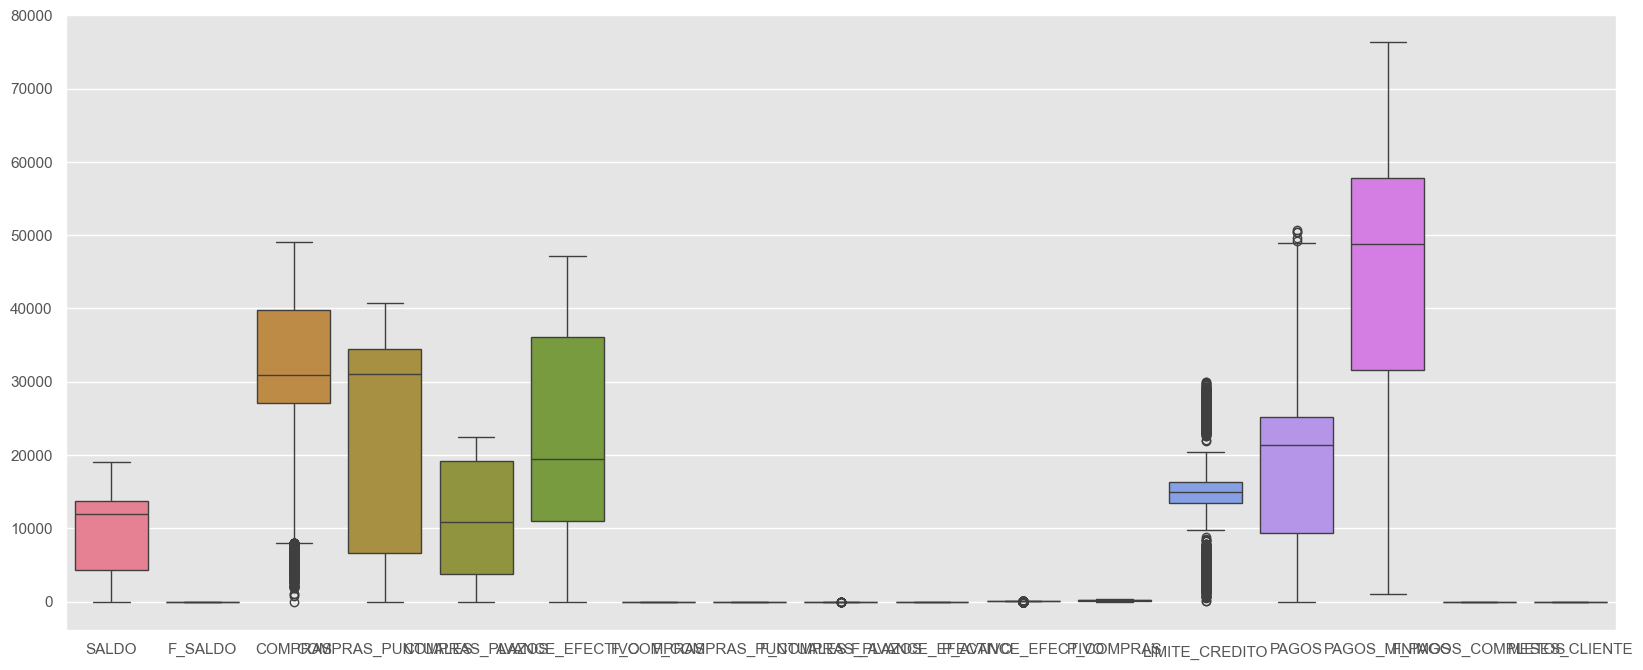

In [9]:
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=df, orient="v")

In [10]:
print(df.dtypes)

ID                      object
SALDO                  float64
F_SALDO                float64
COMPRAS                float64
COMPRAS_PUNTUALES      float64
COMPRAS_PLAZOS         float64
AVANCE_EFECTIVO        float64
F_COMPRAS              float64
F_COMPRAS_PUNTUALES    float64
F_COMPRAS_PLAZOS       float64
F_AVANCE_EFECTIVO      float64
P_AVANCE_EFECTIVO        int64
P_COMPRAS                int64
LÍMITE_CREDITO         float64
PAGOS                  float64
PAGOS_MINIMOS          float64
F_PAGOS_COMPLETOS      float64
MESES_CLIENTE            int64
dtype: object


No se toma en cuenta el ID para las correlaciones ya que es tipo object y además no consideramos que brinde información importante sombre el comportamiento de los clientes.

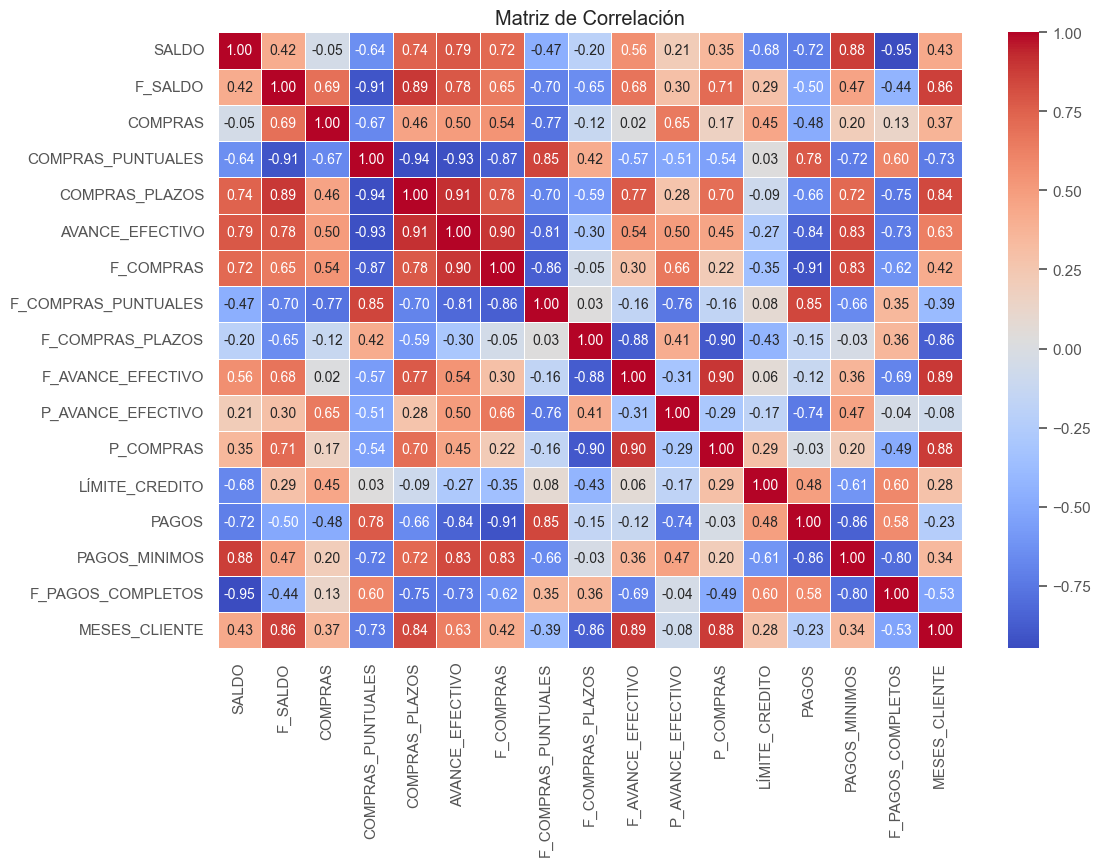

In [11]:
corr_matrix = df.select_dtypes(include=["number"]).corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


### En las correlaciones se pueden observar los siguientes comportamientos:

#### Comportamiento de saldo y pagos

1. Clientes con saldo alto → Compran más a plazos y usan más avances en efectivo
2. Clientes con saldo bajo → Compran más de forma puntual.
3. Quienes pagan el saldo completo → Tienen menor saldo y hacen menos pagos mínimos.

#### Patrón de compras

1. Compras puntuales vs. compras a plazos → Son opuestas. Los clientes tienden a elegir una u otra.
2. Los que compran a plazos → También usan avances en efectivo con más frecuencia.
3. Clientes con compras grandes → Suelen usar avances en efectivo y tener más tiempo con la entidad.

#### Uso de avances en efectivo

1. Clientes que hacen avances en efectivo → Compran a plazos, tienen más saldo y pagan menos.
2. Clientes que NO usan avances en efectivo → Suelen hacer compras puntuales y pagar más.

#### Antigüedad del cliente

1. Clientes más antiguos → Compran más a plazos, hacen avances en efectivo con frecuencia y gastan más en cada compra.
2. Clientes más nuevos → Compran más de forma puntual y a menor escala.

#### Basado en esta información se identificaron grupos potenciales , los cuales son:

1. Clientes que compran a plazos y usan avances en efectivo (saldo alto, pagan menos).
2. Clientes que compran puntual y pagan más (menos saldo, sin avances en efectivo).
3. Clientes antiguos con compras grandes (usan más crédito, gastan más).
4. Clientes nuevos con compras pequeñas (menos deuda, menos pagos mínimos).

### 1.2 Análisis de calidad de datos

Revisamos las dimensiones de calidad: unicidad, completitud, consistencia, validez.
En particular miramos si se presenta algún problema de calidad relacionado con la dimensión y pensamos en opciones para su posterior corrección en la etapa de preparación.

### 1.2.1 Completitud - Análisis de valores nulos o vacíos

In [12]:
df.isnull().sum()
## preguntar a pipe

ID                       0
SALDO                    0
F_SALDO                  0
COMPRAS                  0
COMPRAS_PUNTUALES        0
COMPRAS_PLAZOS           0
AVANCE_EFECTIVO          0
F_COMPRAS                0
F_COMPRAS_PUNTUALES      0
F_COMPRAS_PLAZOS         0
F_AVANCE_EFECTIVO        0
P_AVANCE_EFECTIVO        0
P_COMPRAS                0
LÍMITE_CREDITO           1
PAGOS                    0
PAGOS_MINIMOS          313
F_PAGOS_COMPLETOS        0
MESES_CLIENTE            0
dtype: int64

In [13]:
((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)

PAGOS_MINIMOS          0.034972
LÍMITE_CREDITO         0.000112
SALDO                  0.000000
ID                     0.000000
F_SALDO                0.000000
COMPRAS                0.000000
AVANCE_EFECTIVO        0.000000
F_COMPRAS              0.000000
COMPRAS_PUNTUALES      0.000000
COMPRAS_PLAZOS         0.000000
F_COMPRAS_PLAZOS       0.000000
F_COMPRAS_PUNTUALES    0.000000
P_AVANCE_EFECTIVO      0.000000
F_AVANCE_EFECTIVO      0.000000
P_COMPRAS              0.000000
PAGOS                  0.000000
F_PAGOS_COMPLETOS      0.000000
MESES_CLIENTE          0.000000
dtype: float64

Se pueden observar ciertas filas con nulos , entonces vamos a revisarlo ya que esto puede afectar la agrupación en modelos como K-Means

In [14]:
df[df.isnull().any(axis=1)]


,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE
2,C10003,4305.572068,0.176531,28392.953340,36009.470090,2873.383232,14294.18503,0.419764,0.523662,0.899912,0.207049,72,81,15515.586210,27111.360490,NaN,0.829074,6
31,C10032,3310.590886,0.599920,31427.680340,29692.273750,9395.804625,12119.27183,0.241004,0.759244,0.192674,1.353220,28,307,27471.470630,42788.566250,NaN,0.748458,11
45,C10046,14893.094970,0.754369,43348.871500,7196.968679,20440.098640,36786.55161,0.758416,0.211381,0.501564,0.828791,89,183,16223.672510,8064.315833,NaN,0.377104,10
53,C10054,13030.318170,0.767215,41541.292300,4084.981848,19163.859250,37746.28868,0.854852,0.244613,0.493249,1.065783,97,244,11722.581050,12306.438970,NaN,0.433215,10
78,C10079,3514.910807,0.181879,28067.685300,35318.373000,2660.913729,12034.56947,0.451773,0.494646,0.791138,0.143462,80,65,17314.285730,28487.355700,NaN,0.866448,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8922,C18923,2712.167972,0.282046,28536.331890,35580.354640,4425.331588,18613.02233,0.359371,0.575407,0.860808,0.408806,82,72,14918.052730,21416.015690,NaN,0.920035,6
8929,C18930,6039.746284,0.223305,32230.694630,34187.764740,3450.289051,10161.10731,0.467539,0.569357,0.810294,0.124760,80,97,13346.607000,26226.982450,NaN,0.816095,6
8934,C18935,3907.309029,0.229597,30254.878710,31994.886640,3183.752172,12765.06700,0.406941,0.659441,0.844801,0.276053,74,84,16760.975030,24010.894490,NaN,0.858690,6
8938,C18939,16551.038470,0.099458,8163.267932,33988.691350,10175.408990,16704.32565,0.603985,0.656120,0.750198,1.016616,46,146,1852.802394,17727.359190,NaN,0.165054,8


Cómo límite crédito tiene muy pocos nulos(0.01%) se decidió eliminar estas filas

In [15]:
df = df.dropna(subset=['LÍMITE_CREDITO']).copy()

También se decidió rellenar PAGOS_MINIMOS con la mediana para evitar sesgos por outliers

In [16]:
df['PAGOS_MINIMOS'] = df['PAGOS_MINIMOS'].fillna(df['PAGOS_MINIMOS'].median())

Volvemos a revisar la cantidad de nulos

In [17]:
df[df.isnull().any(axis=1)]

,ID,SALDO,F_SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,P_AVANCE_EFECTIVO,P_COMPRAS,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_PAGOS_COMPLETOS,MESES_CLIENTE


### 1.2.2 Unicidad

In [18]:
df.duplicated(keep = False).sum()

np.int64(0)

Hay 0 duplicados , entonces no se hace nada más con respecto a la unicidad

### 1.2.3 Consistencia

Revisión de valores negativos en columnas relevantes

In [19]:
df.PAGOS.value_counts()

PAGOS
24703.925210    1
21337.027460    1
8000.183624     1
27111.360490    1
23919.113400    1
               ..
9142.211153     1
23826.036390    1
8913.547854     1
45198.571230    1
7571.007225     1
Name: count, Length: 8949, dtype: int64

In [20]:
print(df.describe()) 


              SALDO      F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
count   8949.000000  8949.000000   8949.000000        8949.000000   
mean    9382.834407     0.459235  30525.813963       22911.925086   
std     5118.225213     0.283000  11042.026468       13573.678604   
min        0.000000     0.000000      0.000000           0.000000   
25%     4275.010013     0.188477  27106.472380        6697.909592   
50%    12008.971240     0.306857  30934.348710       31007.815260   
75%    13740.607830     0.756063  39825.766500       34494.807700   
max    19043.138560     1.000000  49039.570000       40761.250000   

       COMPRAS_PLAZOS  AVANCE_EFECTIVO    F_COMPRAS  F_COMPRAS_PUNTUALES  \
count     8949.000000      8949.000000  8949.000000          8949.000000   
mean     11408.535114     22575.147465     0.559820             0.478039   
std       7087.204157     12594.004702     0.214065             0.221885   
min          0.000000         0.000000     0.000000             0.000000  

In [21]:
print(df[df['PAGOS_MINIMOS'] > df['PAGOS']])
#No estoy seguro si esto tiene sentido


          ID         SALDO   F_SALDO       COMPRAS  COMPRAS_PUNTUALES  \
0     C10001   5323.148883  0.250693  26344.072200       38237.442520   
1     C10002  12726.638120  0.791307  37958.519020        5690.742440   
2     C10003   4305.572068  0.176531  28392.953340       36009.470090   
3     C10004   4740.988511  0.178076  27399.003840       38246.863490   
4     C10005  13820.920640  0.826914  42214.021630        7341.007821   
...      ...           ...       ...           ...                ...   
8945  C18946   6095.221156  0.234346  27094.007820       35917.204380   
8946  C18947  12682.575820  0.686025  38433.618850        5293.541956   
8947  C18948  16464.311410  0.189136   4296.196384       32554.759640   
8948  C18949  15531.883780  0.117118  12219.325650       31795.971700   
8949  C18950   5852.488566  0.166820  32480.936200       32368.357730   

      COMPRAS_PLAZOS  AVANCE_EFECTIVO  F_COMPRAS  F_COMPRAS_PUNTUALES  \
0        3727.113162     15708.239680   0.496536  

### 1.2.4 Validez

In [22]:
numerical_columns = df.select_dtypes(include=['number']).columns  # Selecciona solo columnas numéricas
invalid_values = df[(df[numerical_columns] < 0).any(axis=1)]  # Encuentra filas con valores negativos

print(invalid_values)


Empty DataFrame
Columns: [ID, SALDO, F_SALDO, COMPRAS, COMPRAS_PUNTUALES, COMPRAS_PLAZOS, AVANCE_EFECTIVO, F_COMPRAS, F_COMPRAS_PUNTUALES, F_COMPRAS_PLAZOS, F_AVANCE_EFECTIVO, P_AVANCE_EFECTIVO, P_COMPRAS, LÍMITE_CREDITO, PAGOS, PAGOS_MINIMOS, F_PAGOS_COMPLETOS, MESES_CLIENTE]
Index: []


### 1.3 Identificación Variables a usar

Para agrupar clientes de forma efectiva, seleccionaremos variables que representen su comportamiento de compra:

1. SALDO → Representa el dinero disponible.
2. COMPRAS → Total de compras realizadas.
3. COMPRAS_PUNTUALES → Pagos puntuales reflejan clientes responsables.
4. COMPRAS_PLAZOS → Indica qué tanto usan crédito.
5. AVANCE_EFECTIVO → Uso de avances en efectivo, reflejo de necesidad de liquidez.
6. LÍMITE_CREDITO → Capacidad máxima de crédito otorgado.
7. PAGOS → Total de pagos realizados.
8. PAGOS_MINIMOS → Cantidad de pagos mínimos efectuados.
9. F_COMPRAS → Frecuencia de compras.
10. F_COMPRAS_PUNTUALES → Frecuencia de compras puntuales.
11. F_COMPRAS_PLAZOS → Frecuencia de compras a plazos.
12. F_AVANCE_EFECTIVO → Frecuencia de avances en efectivo.
13. F_PAGOS_COMPLETOS → Frecuencia de pagos completos.

In [23]:
features = ["SALDO", "COMPRAS", "COMPRAS_PUNTUALES", "COMPRAS_PLAZOS", 
            "AVANCE_EFECTIVO", "LÍMITE_CREDITO", "PAGOS", "PAGOS_MINIMOS",
            "F_COMPRAS", "F_COMPRAS_PUNTUALES", "F_COMPRAS_PLAZOS", 
            "F_AVANCE_EFECTIVO", "F_PAGOS_COMPLETOS"]

## 2. Modelamiento

#### 2.1 Evaluación de rendimiento de algunos algoritmos

Evaluamos Algunos algoritmos conocidos como K-Means , DBSCAN , GMM y Agglomerative Clustering para determinar cual tiene las mejores métricas

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
df_numeric = df.select_dtypes(include=['number'])  
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)
def evaluate_clustering(model, X, model_name):
    labels = model.fit_predict(X)
    if len(set(labels)) > 1:  
        silhouette = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
    else:
        silhouette, db_index = -1, np.inf 
    print(f"\n{model_name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {db_index:.4f}")
    return labels
kmeans = KMeans(n_clusters=3, random_state=42)
evaluate_clustering(kmeans, X, "K-Means")
dbscan = DBSCAN(eps=0.5, min_samples=5)
evaluate_clustering(dbscan, X, "DBSCAN")
gmm = GaussianMixture(n_components=3, random_state=42)
evaluate_clustering(gmm, X, "GMM")
agglo = AgglomerativeClustering(n_clusters=3)
evaluate_clustering(agglo, X, "Agglomerative Clustering")

KeyboardInterrupt: 

Por otro lado , se hace la prueba con algoritmos ménos conocidos como Spectral Clustering , OPTICS , Birch y Mean Shift a ver si se obtienen mejores resultados

In [ ]:
from sklearn.cluster import SpectralClustering, OPTICS, Birch, MeanShift
from sklearn.metrics import silhouette_score, davies_bouldin_score

df_numeric = df.select_dtypes(include=['number']) 
scaler = StandardScaler()
X = scaler.fit_transform(df_numeric)  
algorithms = {
    "Spectral Clustering": SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans'),
    "OPTICS": OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05),
    "Birch": Birch(n_clusters=4),
    "Mean Shift": MeanShift()
}

for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X)
        silhouette = silhouette_score(X, labels) if len(set(labels)) > 1 else -1
        davies_bouldin = davies_bouldin_score(X, labels) if len(set(labels)) > 1 else np.inf
        print(f"{name} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {davies_bouldin:.4f}")
    except Exception as e:
        print(f"{name} falló: {e}")

c:\Users\Felipe Jaimes\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Clustering - Silhouette Score: 0.7621, Davies-Bouldin Index: 0.3559
OPTICS - Silhouette Score: 0.7311, Davies-Bouldin Index: 0.5818
Birch - Silhouette Score: 0.7694, Davies-Bouldin Index: 0.3282
Mean Shift - Silhouette Score: 0.7694, Davies-Bouldin Index: 0.3282


#### 2.2 K - Means

#### 2.3 Mean Shift

In [ ]:
df_mean_shift= df.copy()

La elección de Mean Shift como algoritmo de clustering se basa en las siguientes métricas y consideraciones:

1. Mejor Silhouette Score → 0.7694 (indica buena separación entre clusters).

2. Menor Davies-Bouldin Index → 0.3282 (clusters más compactos y menos solapados).

3. Mean Shift no requiere definir el número de clusters a desde antes, lo que es útil en problemas donde no se conoce el número óptimo de grupos.

In [ ]:
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

mean_shift = MeanShift()
clusters = mean_shift.fit_predict(X_scaled)

df_mean_shift["Cluster"] = clusters

cluster_counts = df_mean_shift["Cluster"].value_counts()

print("Número de clientes por cluster:")
print(cluster_counts)

df_mean_shift.to_csv("clientes_segmentados_mean_shift.csv", index=False)

Número de clientes por cluster:
Cluster
0    3481
1    3283
2    1247
3     938
Name: count, dtype: int64


Utilicé StandardScaler para escalar las características ya que Mean Shift es un algoritmo basado en distancias, por lo que es crucial que todas las características estén en la misma escala. El escalado evita que características con magnitudes mayores dominen el cálculo de distancias.

Además ,asigné los clusters resultantes a una nueva columna en el DataFrame ya que permite analizar y visualizar los clusters fácilmente, así como exportar los resultados para su uso posterior.

No especifiqué manualmente el parámetro bandwidth, por lo que el algoritmo lo calculó automáticamente , este determina el tamaño de la ventana utilizada para estimar la densidad de los datos. Al no especificarlo, el algoritmo utiliza una heurística para calcular un valor adecuado, lo que simplifica la implementación y evita sesgos en la selección manual.

No modifiqué el parámetro cluster_all, que por defecto es True para asegurar que todos los puntos de datos sean asignados a un cluster, incluso si están en regiones de baja densidad.

El algoritmo identificó 4 clusters de manera automática. Los clusters están bien balanceados, lo que sugiere que el algoritmo encontró grupos significativos en los datos.

#### 2.3.1 Análisis de resultados

#### 2.3.1.1 Validación Cuantitativa

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Coeficiente de Silueta: {silhouette_avg:.2f}")
if silhouette_avg > 0.7:
    print("Los clusters están bien separados.")
elif silhouette_avg > 0.5:
    print("Los clusters tienen una separación razonable.")
else:
    print("Los clusters podrían estar superpuestos o no estar bien definidos.")
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Índice de Davies-Bouldin: {davies_bouldin:.2f}")
if davies_bouldin < 0.5:
    print("Los clusters están bien separados.")
elif davies_bouldin < 1.0:
    print("Los clusters tienen una separación aceptable.")
else:
    print("Los clusters podrían estar superpuestos o no estar bien definidos.")

Coeficiente de Silueta: 0.79
Los clusters están bien separados.
Índice de Davies-Bouldin: 0.30
Los clusters están bien separados.


Desde el punto de vista cuantitativo, el modelo de clustering muestra una alta calidad, evidenciada por un coeficiente de silueta de 0.79 y un índice de Davies-Bouldin de 0.30. Estos valores indican que los clusters están bien separados y son cohesivos internamente, lo que sugiere que el modelo ha agrupado los datos de manera efectiva. En resumen, el modelo tiene un rendimiento cuantitativo excelente, pero su valor final dependerá de la relevancia de los grupos identificados en el contexto de FinanzasAlpes.

#### 2.3.1.2 Validación Cualitativa

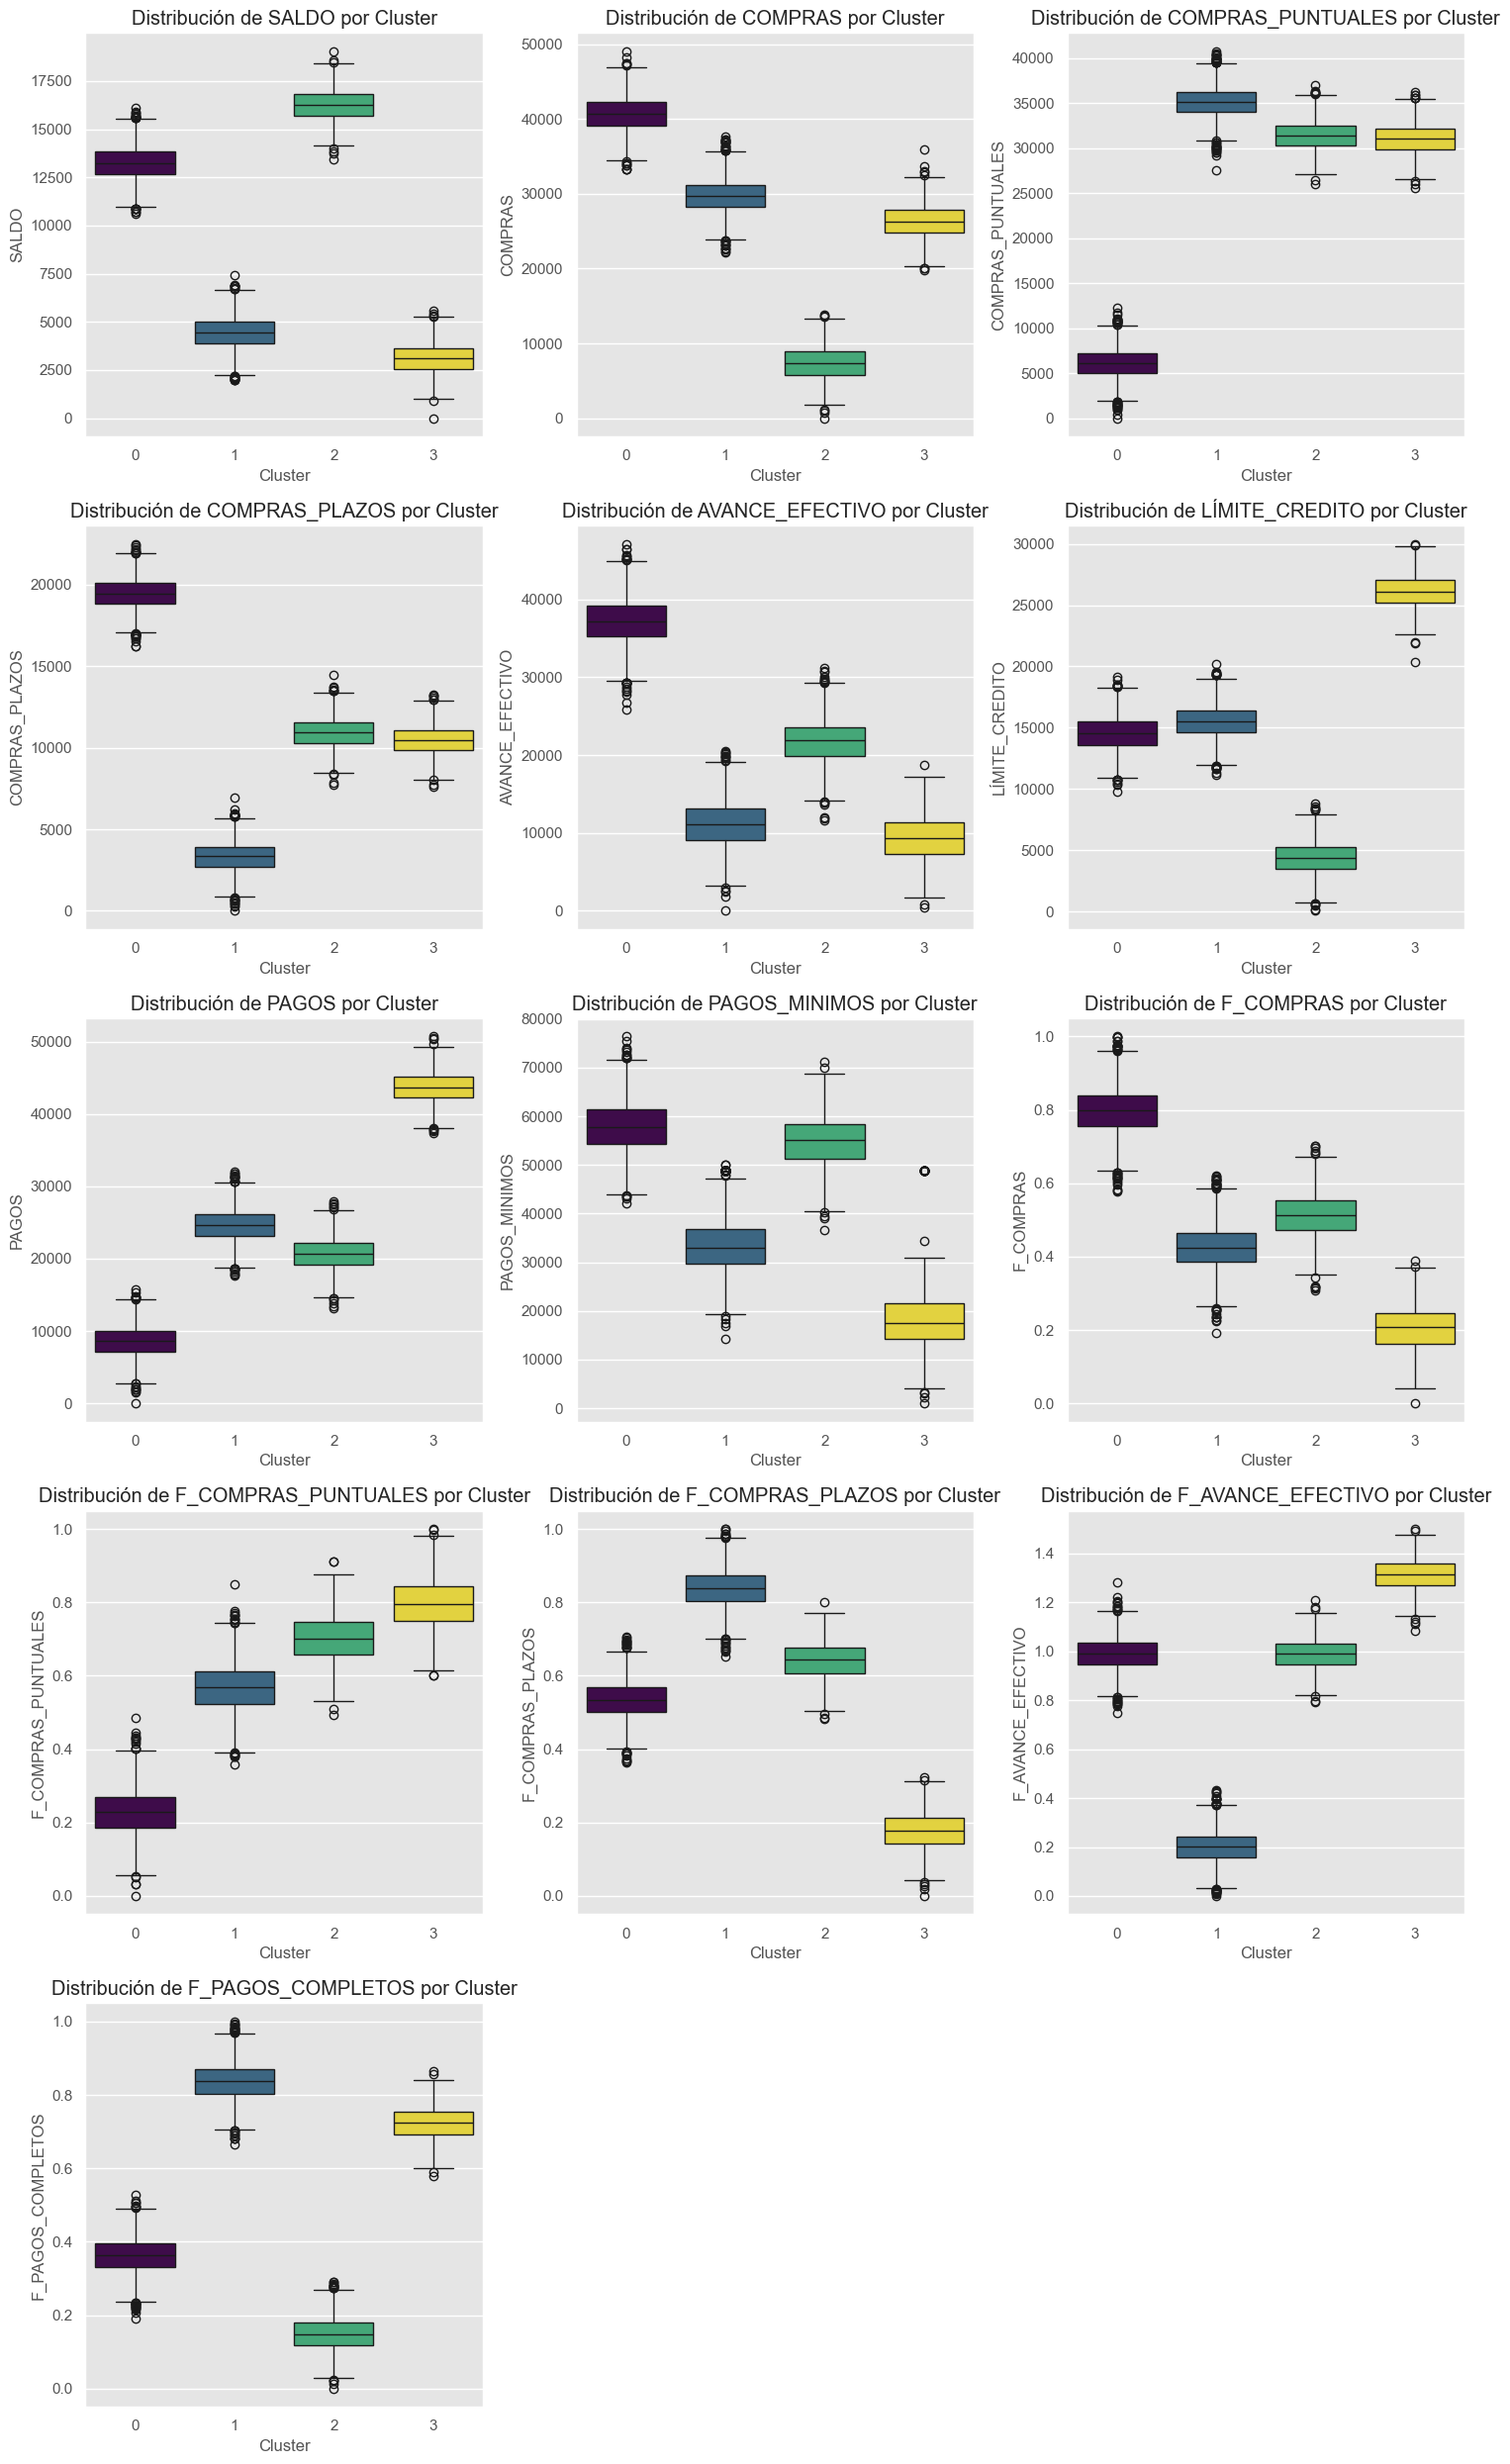

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = len(features)

n_rows = (num_features // 3) + (1 if num_features % 3 != 0 else 0)
n_cols = 3
plt.figure(figsize=(15, 5 * n_rows)) 

for i, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df_mean_shift["Cluster"], y=df_mean_shift[feature], hue=df_mean_shift["Cluster"], palette="viridis", legend=False)
    plt.title(f"Distribución de {feature} por Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)

plt.tight_layout() 
plt.show()

Se imprime las medias de cada columna por cada cluster para obtener datos mas detallados al hacer el análisis

In [ ]:
import pandas as pd

cluster_means = df_mean_shift.groupby("Cluster")[features].mean()
for cluster, means in cluster_means.iterrows():
    print(f"\nCluster {cluster}:")
    for feature, mean_value in means.items():
        print(f"- {feature}: {mean_value:.2f}")


Cluster 0:
- SALDO: 13249.98
- COMPRAS: 40669.37
- COMPRAS_PUNTUALES: 6131.49
- COMPRAS_PLAZOS: 19462.50
- AVANCE_EFECTIVO: 37230.72
- LÍMITE_CREDITO: 14538.13
- PAGOS: 8557.50
- PAGOS_MINIMOS: 57810.28
- F_COMPRAS: 0.80
- F_COMPRAS_PUNTUALES: 0.23
- F_COMPRAS_PLAZOS: 0.54
- F_AVANCE_EFECTIVO: 0.99
- F_PAGOS_COMPLETOS: 0.36

Cluster 1:
- SALDO: 4451.74
- COMPRAS: 29752.28
- COMPRAS_PUNTUALES: 35147.98
- COMPRAS_PLAZOS: 3313.34
- AVANCE_EFECTIVO: 11127.11
- LÍMITE_CREDITO: 15524.06
- PAGOS: 24627.58
- PAGOS_MINIMOS: 33491.45
- F_COMPRAS: 0.43
- F_COMPRAS_PUNTUALES: 0.57
- F_COMPRAS_PLAZOS: 0.84
- F_AVANCE_EFECTIVO: 0.20
- F_PAGOS_COMPLETOS: 0.84

Cluster 2:
- SALDO: 16287.01
- COMPRAS: 7392.85
- COMPRAS_PUNTUALES: 31419.51
- COMPRAS_PLAZOS: 10930.97
- AVANCE_EFECTIVO: 21758.73
- LÍMITE_CREDITO: 4364.17
- PAGOS: 20649.27
- PAGOS_MINIMOS: 54976.69
- F_COMPRAS: 0.51
- F_COMPRAS_PUNTUALES: 0.70
- F_COMPRAS_PLAZOS: 0.64
- F_AVANCE_EFECTIVO: 0.99
- F_PAGOS_COMPLETOS: 0.15

Cluster 3:
- SALDO

#### Cluster 0

Este cluster representa a los clientes más activos y con alto poder adquisitivo.

Realizan compras frecuentes y de alto valor, además de utilizar mucho el avance efectivo.

Tienen un saldo alto y un límite de crédito moderado.

#### Recomendaciones Cluster 0

Ofrecer programas de recompensas o cashback para fidelizarlos.

Proporcionar aumentos de límite de crédito para incentivar más compras.

Dirigir campañas de marketing para productos premium o exclusivos.

#### Cluster 1

Este cluster representa a los clientes moderados que realizan compras regulares pero no muy altas.

Prefieren compras a plazos y tienen una alta frecuencia de pagos completos.

Tienen un límite de crédito alto pero un saldo bajo, lo que sugiere que no utilizan todo su crédito disponible.

#### Recomendaciones Cluster 1

Ofrecer planes de pago a plazos con intereses bajos.

Incentivar el uso del límite de crédito con promociones o descuentos.

Enviar recordatorios para aumentar la frecuencia de compras.

#### Cluster 2

Este cluster representa a los clientes con alto saldo pero bajo límite de crédito.

Realizan pocas compras pero utilizan mucho el avance efectivo.

Tienen una baja frecuencia de pagos completos, lo que sugiere que podrían estar utilizando el crédito de manera intensiva.

#### Recomendaciones Cluster 2

Ofrecer aumentos de límite de crédito para evitar el sobreendeudamiento.

Proporcionar asesoría financiera para mejorar la gestión del crédito.

Incentivar el pago completo de la deuda con descuentos o beneficios.

#### Cluster 3

Este cluster representa a los clientes con bajo saldo pero alto límite de crédito.

Realizan compras moderadas y tienen una alta frecuencia de compras puntuales.

Prefieren pagar sus deudas de manera completa y tienen un uso moderado del avance efectivo.

#### Recomendaciones Cluster 3

Incentivar el uso del límite de crédito con promociones o descuentos.

Ofrecer programas de recompensas para aumentar la frecuencia de compras

Dirigir campañas de marketing para productos de bajo costo pero alta rotación.

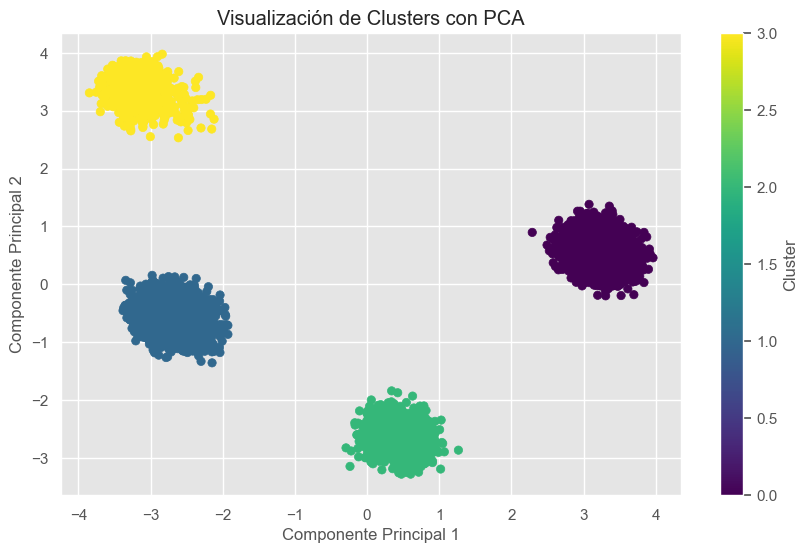

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_mean_shift["Cluster"], cmap='viridis', marker='o')
plt.title("Visualización de Clusters con PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

Para tener una idea más detallada de como influye cada columna en los componentes , se muestran los loadings a continuación:

In [ ]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=features, index=['Componente 1', 'Componente 2'])
print("Loadings (Contribución de cada característica a los componentes):")
print(loadings_df)

Loadings (Contribución de cada característica a los componentes):
                SALDO   COMPRAS  COMPRAS_PUNTUALES  COMPRAS_PLAZOS  \
Componente 1  0.30632  0.156813          -0.333381        0.332341   
Componente 2 -0.23212  0.358463          -0.199577        0.194230   

              AVANCE_EFECTIVO  LÍMITE_CREDITO     PAGOS  PAGOS_MINIMOS  \
Componente 1         0.347896       -0.126225 -0.310333       0.314734   
Componente 2         0.042952        0.579027  0.173303      -0.220367   

              F_COMPRAS  F_COMPRAS_PUNTUALES  F_COMPRAS_PLAZOS  \
Componente 1   0.329204            -0.288060         -0.108301   
Componente 2  -0.052159            -0.085802         -0.460638   

              F_AVANCE_EFECTIVO  F_PAGOS_COMPLETOS  
Componente 1           0.204299          -0.287812  
Componente 2           0.272497           0.166827  


Los loadings nos permiten entender qué características están influyendo en cada componente principal, en nuestro caso se observa:


1. Componente 1 está relacionado con el uso del crédito y los hábitos de pago.

2. Componente 2 está relacionado con el límite de crédito y el volumen de compras.

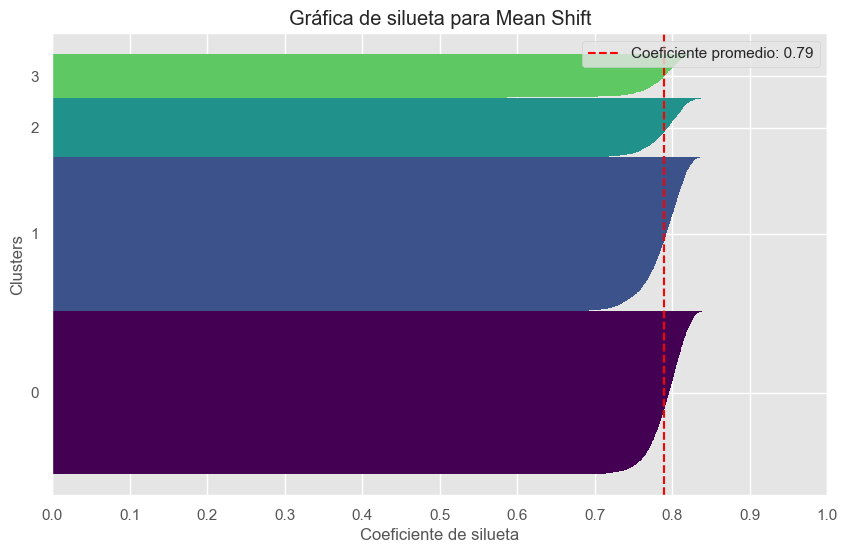

In [ ]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

def plot_silhouette(data, labels, ylabel='Clusters', xlabel='Coeficiente de silueta', title='Gráfica de silueta para Mean Shift'):
    
    cluster_labels = np.unique(labels)
    n_clusters = len(cluster_labels)
    silhouette_vals = silhouette_samples(data, labels, metric='euclidean')
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.viridis(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                 c_silhouette_vals,
                 height=1.0,
                 edgecolor='none',
                 color=color)r
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    
    plt.axvline(silhouette_avg, color="red", linestyle="--", label=f'Coeficiente promedio: {silhouette_avg:.2f}')
    plt.yticks(yticks, cluster_labels)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.legend(loc='upper right')
    plt.show()

plot_silhouette(X_scaled, df_mean_shift["Cluster"])

#### 2.4 Gaussian Mixture - Estudiante 3 Jairo Fierro

Un problema del algoritmo K-means es que calcula la distancia entre puntos de datos basado en una ruta circular, por lo que los datos que no son circulares no se agrupan correctamente. El algoritmo Gaussian Mixture corrige este problema, ya que no necesita que los datos estén en un formato circular.

La forma en que este algortimo trabaja es utilizando multiples distribuciones Gaussianas para ajustar los datos que no tienen formas circulares. Por otro lado, los modelos de mezxla gaussiana utilizan un agrupamiento suave, donde los puntos de datos pueden pertenecer a varios grupos con determinada probabilidad. Esto proporciona una forma mas flexible para manejar los grupos que no son cercanos a los centroides.

In [ ]:
from numpy import unique
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from numpy import where
from sklearn.metrics import silhouette_samples, silhouette_score


In [ ]:
df_gaussian= df.copy()
df_gaussian=df_gaussian[features]
df_gaussian

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
0,5323.148883,26344.072200,38237.442520,3727.113162,15708.239680,16819.480040,21337.027460,39452.958120,0.496536,0.464442,0.821611,0.194502,0.817907
1,12726.638120,37958.519020,5690.742440,18733.810960,38284.354430,15617.570580,8000.183624,63013.748480,0.699457,0.250327,0.654863,1.083902,0.343119
2,4305.572068,28392.953340,36009.470090,2873.383232,14294.185030,15515.586210,27111.360490,48786.419665,0.419764,0.523662,0.899912,0.207049,0.829074
3,4740.988511,27399.003840,38246.863490,3402.853375,6936.812518,12926.587970,23919.113400,38444.219980,0.439666,0.606597,0.783129,0.228299,0.883984
4,13820.920640,42214.021630,7341.007821,19273.070990,40091.347850,14404.705070,6994.688474,62041.617340,0.821412,0.283579,0.501361,1.106350,0.383186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6095.221156,27094.007820,35917.204380,3463.821376,11711.578890,17623.810280,23954.396950,34841.829890,0.469832,0.539477,0.828321,0.191030,0.866856
8946,12682.575820,38433.618850,5293.541956,18924.799800,34444.867320,12433.814930,7375.625322,66726.372990,0.710331,0.276426,0.546059,0.935152,0.306600
8947,16464.311410,4296.196384,32554.759640,11231.500430,15214.671560,3307.587117,22947.759220,54761.962210,0.424665,0.746010,0.690380,1.063788,0.129242
8948,15531.883780,12219.325650,31795.971700,12390.432130,13856.393210,6148.232910,21369.503520,50368.309060,0.450670,0.805140,0.608737,1.058548,0.087448


El hiperparametro n_components=3 define el número de clusters que el modelo debe encontrar en los datos, por lo tanto  el modelo buscará tres grupos diferentes en df_gaussian. 

El hiperparametro random_state=0 fija una semilla para la reproducibilidad de los resultados con el fin de ejecutar el modelo varias veces con la misma random_state y que los resultados sean identicos. En este caso el valor del hiperparametro es arbitrario y cualquier numero funciona como semilla.

In [ ]:

X = df_gaussian

# Definición del modelo con tres componentes 
gmm = GaussianMixture(n_components=3, random_state=0)

#Entrenar modelo
gmm.fit(X)

# Asignación de clusters
gaussian_result = gmm.predict(X)

gaussian_result

array([2, 1, 2, ..., 0, 0, 2])

In [ ]:
gaussian_clusters = unique(gaussian_result)
gaussian_clusters

array([0, 1, 2])

El modelo identificó 3 clusters (0, 1, 2), lo cual es correcto porque n_components es 3.

In [ ]:
df_gaussian["Cluster_gaussian"]=gaussian_result
df_gaussian

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS,Cluster_gaussian
0,5323.148883,26344.072200,38237.442520,3727.113162,15708.239680,16819.480040,21337.027460,39452.958120,0.496536,0.464442,0.821611,0.194502,0.817907,2
1,12726.638120,37958.519020,5690.742440,18733.810960,38284.354430,15617.570580,8000.183624,63013.748480,0.699457,0.250327,0.654863,1.083902,0.343119,1
2,4305.572068,28392.953340,36009.470090,2873.383232,14294.185030,15515.586210,27111.360490,48786.419665,0.419764,0.523662,0.899912,0.207049,0.829074,2
3,4740.988511,27399.003840,38246.863490,3402.853375,6936.812518,12926.587970,23919.113400,38444.219980,0.439666,0.606597,0.783129,0.228299,0.883984,2
4,13820.920640,42214.021630,7341.007821,19273.070990,40091.347850,14404.705070,6994.688474,62041.617340,0.821412,0.283579,0.501361,1.106350,0.383186,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6095.221156,27094.007820,35917.204380,3463.821376,11711.578890,17623.810280,23954.396950,34841.829890,0.469832,0.539477,0.828321,0.191030,0.866856,2
8946,12682.575820,38433.618850,5293.541956,18924.799800,34444.867320,12433.814930,7375.625322,66726.372990,0.710331,0.276426,0.546059,0.935152,0.306600,1
8947,16464.311410,4296.196384,32554.759640,11231.500430,15214.671560,3307.587117,22947.759220,54761.962210,0.424665,0.746010,0.690380,1.063788,0.129242,0
8948,15531.883780,12219.325650,31795.971700,12390.432130,13856.393210,6148.232910,21369.503520,50368.309060,0.450670,0.805140,0.608737,1.058548,0.087448,0


### 2.4.1 Visualizar resultado

<Axes: xlabel='Cluster_gaussian'>

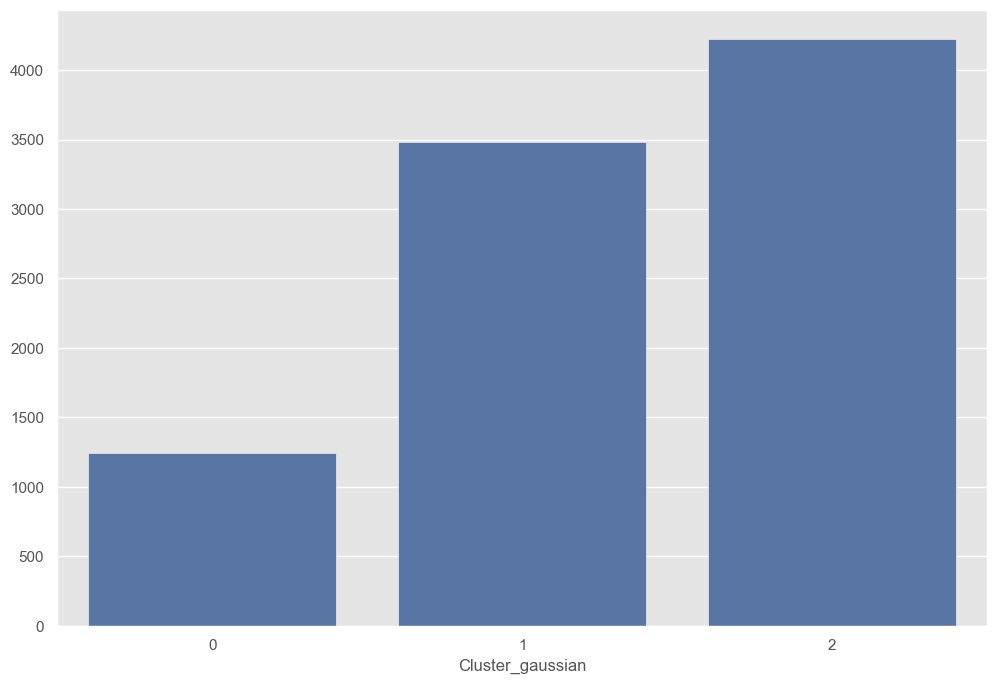

In [ ]:
cluster_distrib = df_gaussian['Cluster_gaussian'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')


Se puede ver que hay mas datos en el cluster 2 y el cluster con menos datos es el 0.

Ahora, agruparemos los datos por el cluster al que pertenecen para ver el numero de datos de cada columna en cada cluster.

In [ ]:
df_gaussian.groupby('Cluster_gaussian').count()

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
Cluster_gaussian,,,,,,,,,,,,,
0,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247,1247
1,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481,3481
2,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221,4221


In [ ]:
sns.pairplot(data=df_gaussian, hue="Cluster_gaussian")

Error in callback <function flush_figures at 0x0000017082599280> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
#Creamos una función basada en el concepto de silueta
from matplotlib import cm


def plot_silhouette(data, 
                    labels,
                   ylabel = 'Grupos',
                   xlabel = "Coeficiente de silueta",
                   title = 'Gráfica de silueta'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(np.arange(0, 1.1, 0.1))  # Muestra ticks cada 0.1 en el rango de 0 a 1
    plt.show()

[0 1 2]


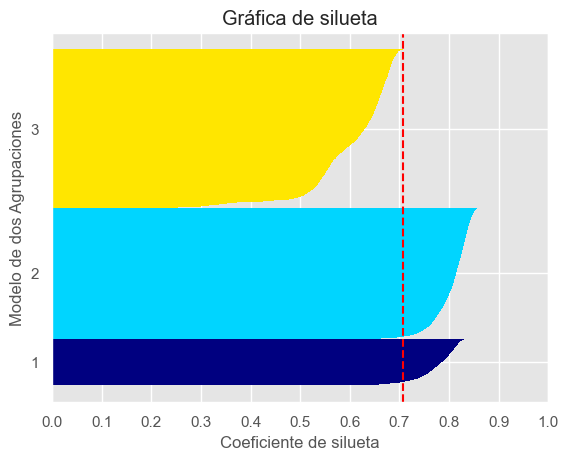

In [ ]:
plot_silhouette(data = df_gaussian, 
                labels = gaussian_result, 
                ylabel = 'Modelo de dos Agrupaciones')

Los valores de la silueta están entre 0 y un poco mas de 0.8, lo que indica que los clusters están mas o menos bien separados.
Se identifica un buen valor del coeficiente de silueta aprocimadamente 0.7, lo que indica que los clusters están bien asignados. El valor mas lejano a 1 es aproximandamente 0.5.
El cluster amarillo y el azul oscuro tienen valores de silueta más altos, lo que sugiere que están bien definidos y separados de los demás.

#### 2.4.2 Segunda iteración del modelo con mejoras a nivel de preparación de datos y configuración de hiperparámetros

Ahora haremos mejoras en el tratamiento de datos para mejorar los resultados del modelo. Primero, crearemos un nuevo dataframe.

In [ ]:
df_gaussian_New= df.copy()
df_gaussian_New=df_gaussian_New[features]
df_gaussian_New

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
0,5323.148883,26344.072200,38237.442520,3727.113162,15708.239680,16819.480040,21337.027460,39452.958120,0.496536,0.464442,0.821611,0.194502,0.817907
1,12726.638120,37958.519020,5690.742440,18733.810960,38284.354430,15617.570580,8000.183624,63013.748480,0.699457,0.250327,0.654863,1.083902,0.343119
2,4305.572068,28392.953340,36009.470090,2873.383232,14294.185030,15515.586210,27111.360490,48786.419665,0.419764,0.523662,0.899912,0.207049,0.829074
3,4740.988511,27399.003840,38246.863490,3402.853375,6936.812518,12926.587970,23919.113400,38444.219980,0.439666,0.606597,0.783129,0.228299,0.883984
4,13820.920640,42214.021630,7341.007821,19273.070990,40091.347850,14404.705070,6994.688474,62041.617340,0.821412,0.283579,0.501361,1.106350,0.383186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,6095.221156,27094.007820,35917.204380,3463.821376,11711.578890,17623.810280,23954.396950,34841.829890,0.469832,0.539477,0.828321,0.191030,0.866856
8946,12682.575820,38433.618850,5293.541956,18924.799800,34444.867320,12433.814930,7375.625322,66726.372990,0.710331,0.276426,0.546059,0.935152,0.306600
8947,16464.311410,4296.196384,32554.759640,11231.500430,15214.671560,3307.587117,22947.759220,54761.962210,0.424665,0.746010,0.690380,1.063788,0.129242
8948,15531.883780,12219.325650,31795.971700,12390.432130,13856.393210,6148.232910,21369.503520,50368.309060,0.450670,0.805140,0.608737,1.058548,0.087448


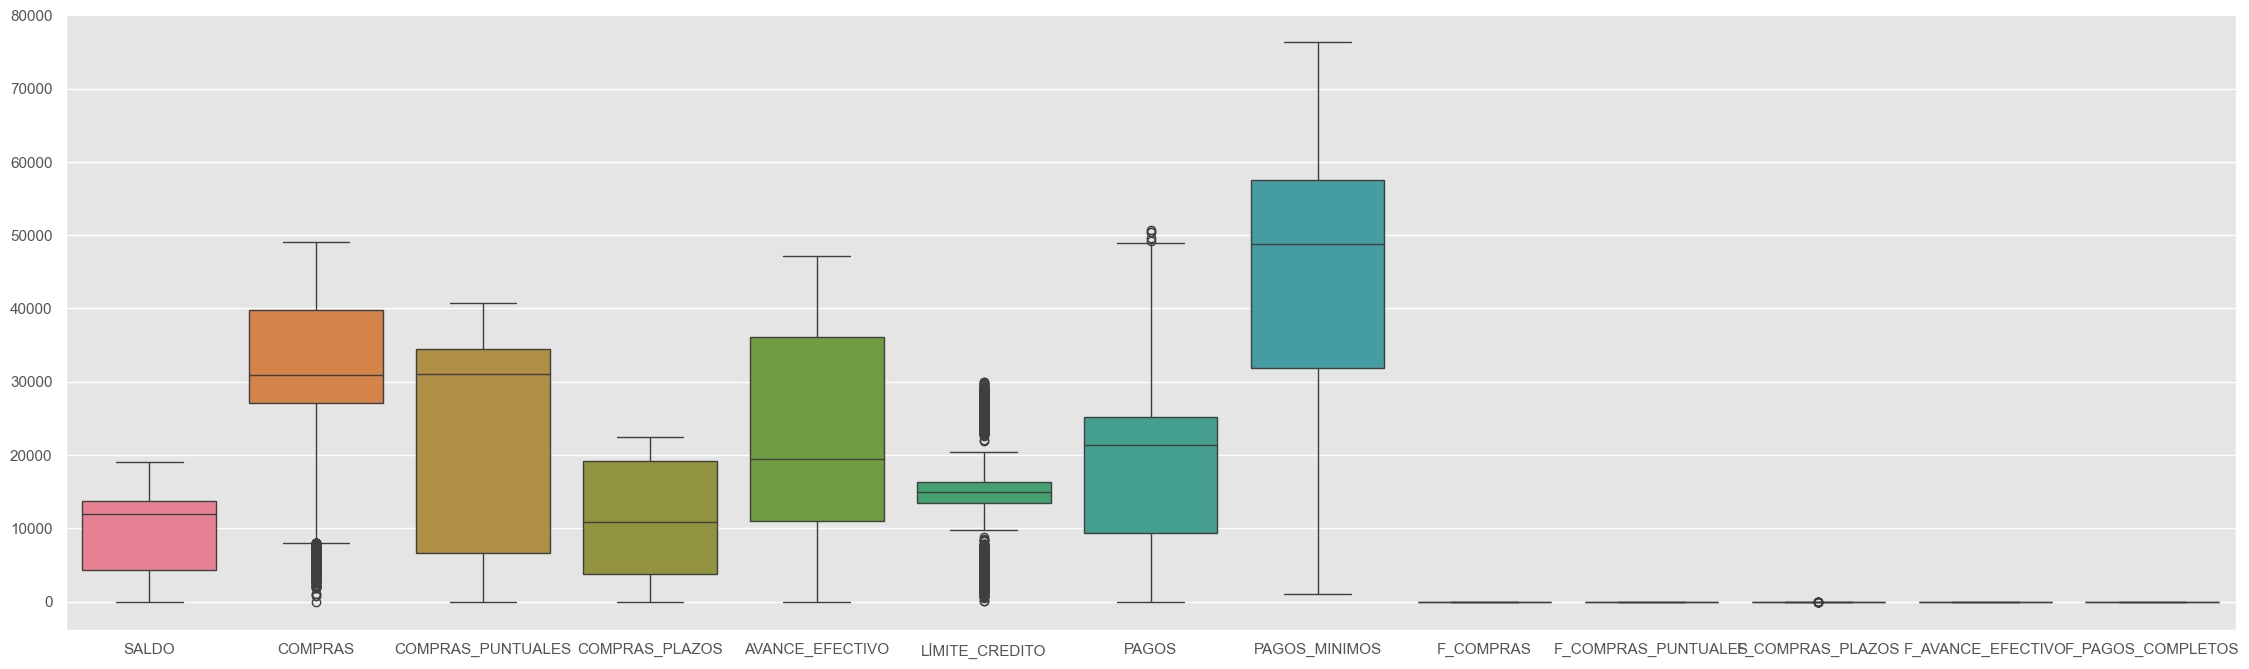

In [ ]:
fig=plt.figure(figsize=(28,8))
ax = sns.boxplot(data=df_gaussian_New, orient="v")

En este boxplot se puede ver que hay outliers en las columnas COMPRAS Y LIMIT_CREDITO. En esta segunda iteración normalizaremos los datos para reducir el impacto de los valores atipicos(outliers) utilizando la mediana y el rango intercuartil.

In [ ]:
columnas_numericas = df_gaussian_New.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# Transformar las columnas 
df_gaussian_New[columnas_numericas] = scaler.fit_transform(df_gaussian_New[columnas_numericas])


In [ ]:
df_gaussian_New

,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
0,-0.706329,-0.360891,0.260088,-0.461649,-0.149104,0.674671,-0.001807,-0.363549,-0.024026,-0.173452,0.721596,-0.943259,0.805217
1,0.075818,0.552245,-0.910788,0.513409,0.746550,0.242640,-0.841049,0.554170,0.524662,-0.711011,0.159576,0.170621,-0.187141
2,-0.813831,-0.199806,0.179936,-0.517120,-0.205203,0.205982,0.361552,0.000000,-0.231614,-0.024775,0.985509,-0.927545,0.828559
3,-0.767831,-0.277951,0.260426,-0.482718,-0.497090,-0.724643,0.160675,-0.402840,-0.177798,0.183444,0.591892,-0.900931,0.943326
4,0.191425,0.886816,-0.851419,0.548447,0.818238,-0.193329,-0.904321,0.516304,0.854424,-0.627528,-0.357799,0.198735,-0.103397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.624762,-0.301930,0.176616,-0.478756,-0.307662,0.963790,0.162895,-0.543157,-0.096230,0.014930,0.744212,-0.947606,0.907526
8946,0.071163,0.589598,-0.925077,0.525818,0.594228,-0.901772,-0.880350,0.698781,0.554066,-0.645487,-0.207146,-0.015673,-0.263470
8947,0.470688,-2.094311,0.055652,0.025947,-0.168685,-4.182228,0.099551,0.232754,-0.218361,0.533454,0.279285,0.145430,-0.634168
8948,0.372181,-1.471388,0.028354,0.101249,-0.222572,-3.161148,0.000237,0.061616,-0.148045,0.681906,0.004108,0.138867,-0.721521


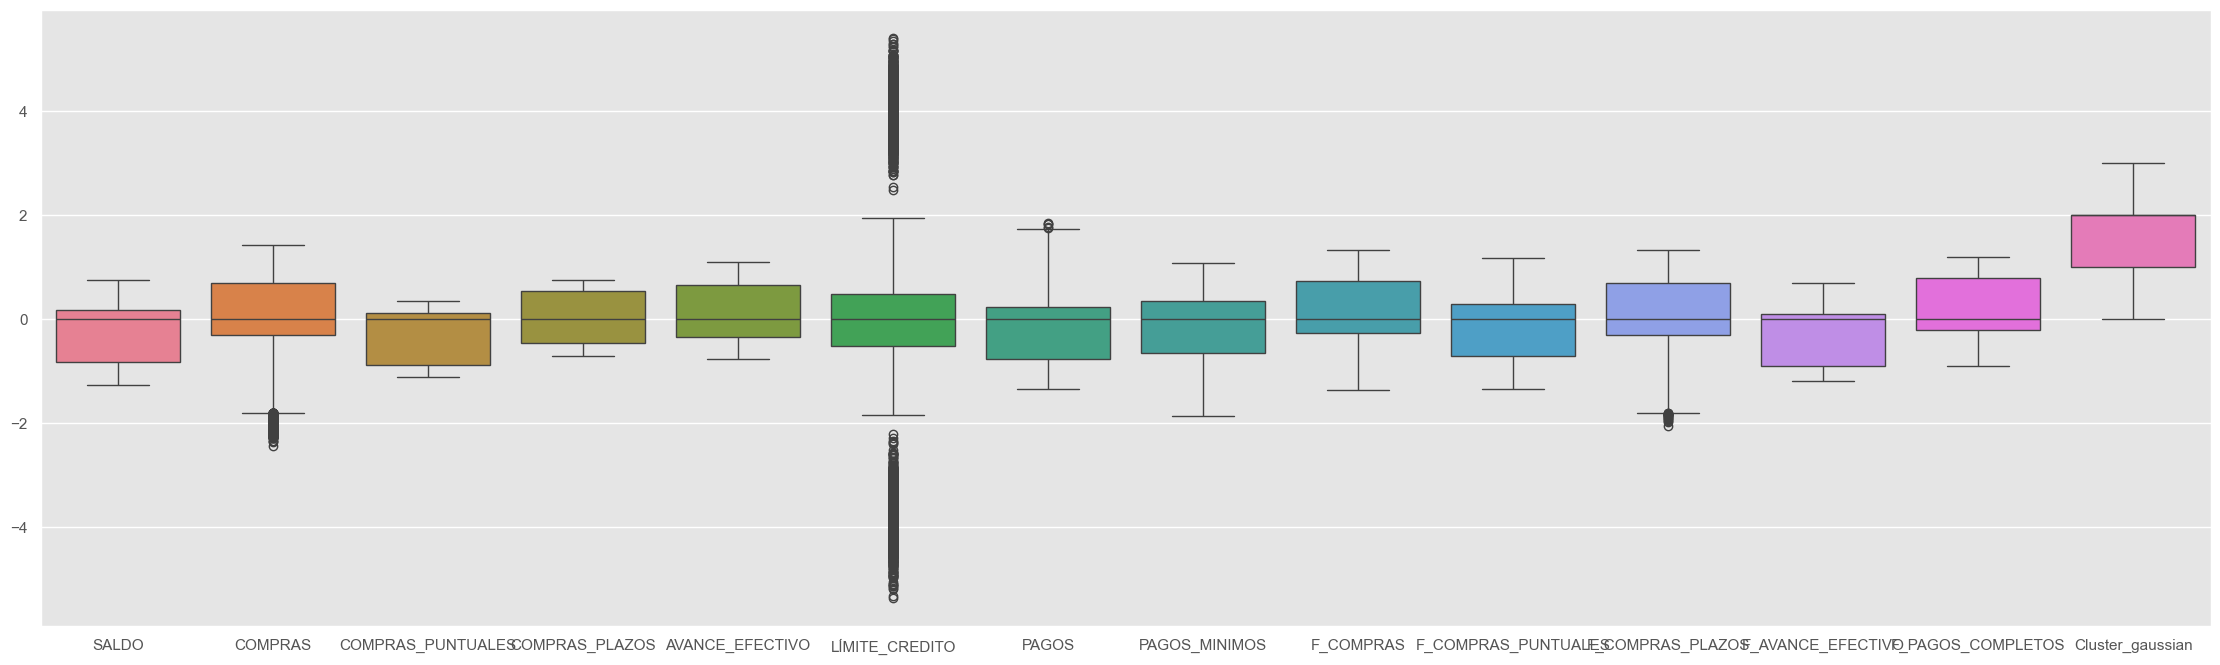

In [ ]:
fig=plt.figure(figsize=(28,8))
ax = sns.boxplot(data=df_gaussian_New, orient="v")

En el boxplot se puede ver que las variables han sido escaladas correctamente, ya que todas tienen una media cercana a 0 y su dispersión es uniforme. Los outliers aún están presentes, pero considero que no afectan la escala de los datos ya que al estar escalados se reduce su influencia en el modelo. 

#### 2.4.3 Encontrar el número óptimo de clústeres utilizando el criterio de información bayesiano (BIC) y el criterio de información de Akaike (AIC). 

Para determinar la cantidad de componentes y poner el mejor valor como hiperparametro, voy a utilizar el criterio de información bayesiano (BIC) y el criterio de información de Akaike (AIC), los cuales ayudan a evaluar la bondad de ajuste y los valores más bajos indican mejores modelos.

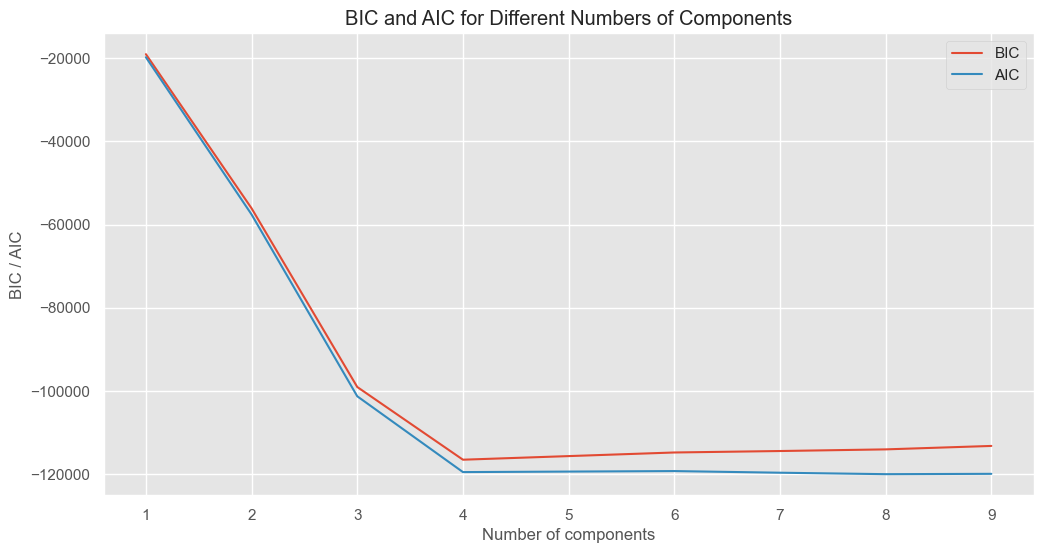

In [ ]:
n_components_range = range(1, 10)
bics = []
aics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(df_gaussian_New)
    bics.append(gmm.bic(df_gaussian_New))
    aics.append(gmm.aic(df_gaussian_New))

plt.figure(figsize=(12, 6))
plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('BIC / AIC')
plt.legend()
plt.title('BIC and AIC for Different Numbers of Components')
plt.show()

El criterio de elección del número de componentes optimo es el componentes que minimice el BIC y  también el que minimice el AIC. En el grafico de arriba se puede ver en la pendiente que se disminuye el valor tanto de BIC como de AIC hasta el componente 4 y desde ahí empieza a estabilizarse la línea.

#### 2.4.4 Construcción de modelo con el número de clusters obtenidos

De acuerdo al análisis el valor optimo para el hiperparametro de n_components es 4 por lo cual el modelo debe encontrar 4 clusters en los datos.

El hiperparametro random_state al igual que en la primera iteración la semilla se fija como 0.

In [ ]:
X_new = df_gaussian_New

# Definición del modelo con tres componentes 
gmm_new = GaussianMixture(n_components=4,random_state=0)

gmm_new.fit(X_new)

# Asignación de clusters
gaussian_result_new = gmm_new.predict(X_new)

gaussian_result_new

array([2, 1, 2, ..., 3, 3, 2], dtype=int64)

#### Mostrar resultados

<Axes: xlabel='Cluster_gaussian'>

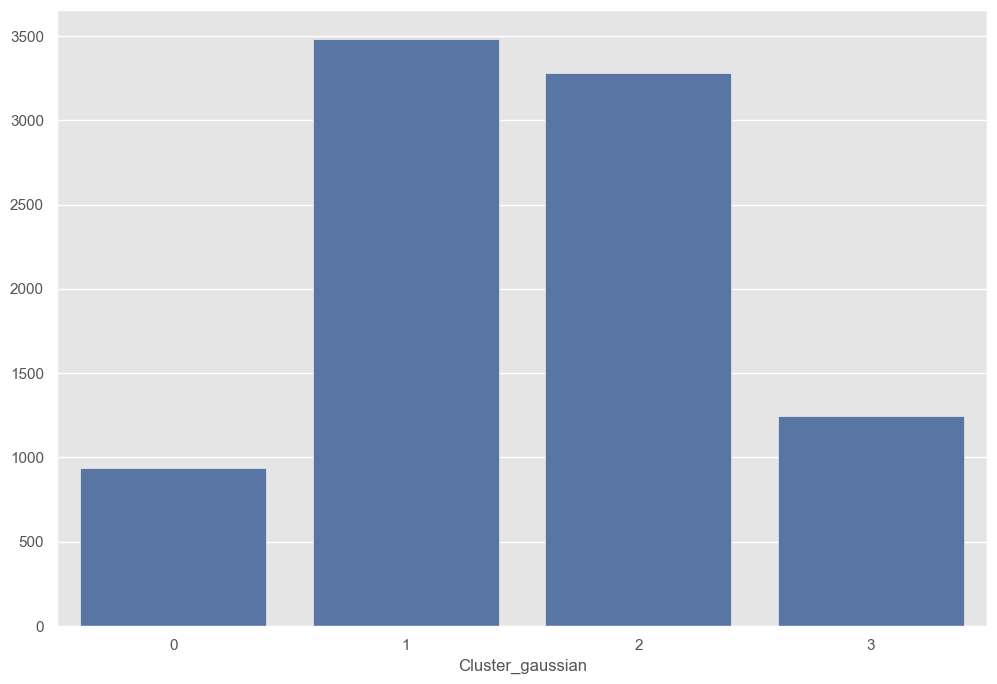

In [ ]:
labels = gaussian_result_new
df_gaussian_New['Cluster_gaussian'] = labels
cluster_distrib = df_gaussian_New['Cluster_gaussian'].value_counts()
fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b')

En este gráfico se puede ver una segmentación más balanceada y diferenciada de los datos.

#### 2.4.5 Mostrar silueta del modelo

[0 1 2 3]


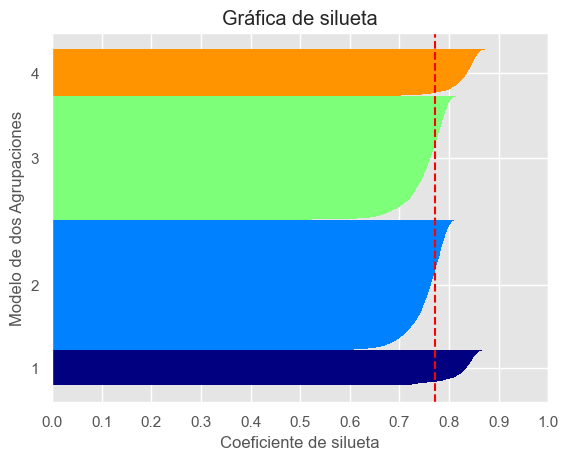

In [ ]:
plot_silhouette(data = X_new, 
                labels = gaussian_result_new, 
                ylabel = 'Modelo de dos Agrupaciones')

In [ ]:
df_gaussian_New.groupby("Cluster_gaussian").mean()



,SALDO,COMPRAS,COMPRAS_PUNTUALES,COMPRAS_PLAZOS,AVANCE_EFECTIVO,LÍMITE_CREDITO,PAGOS,PAGOS_MINIMOS,F_COMPRAS,F_COMPRAS_PUNTUALES,F_COMPRAS_PLAZOS,F_AVANCE_EFECTIVO,F_PAGOS_COMPLETOS
Cluster_gaussian,,,,,,,,,,,,,
0,-0.939951,-0.360970,0.001489,-0.022384,-0.401727,4.019630,1.407031,-1.175818,-0.807673,0.662377,-1.447913,0.459829,0.608250
1,0.131107,0.765374,-0.894932,0.560755,0.704750,-0.145367,-0.805979,0.351489,0.791014,-0.768521,-0.244155,0.054150,-0.143987
2,-0.798389,-0.092935,0.148944,-0.488534,-0.330850,0.209026,0.205257,-0.595756,-0.215716,0.084671,0.777966,-0.935119,0.845674
3,0.451956,-1.850849,0.014811,0.006420,0.090935,-3.802435,-0.045085,0.241118,0.022933,0.424374,0.118360,0.053487,-0.591177


En la siguiente sección se analizarán los resultados obtenidos

#### 2.4.6 Análisis cuantitativo y cualitativo de los resultados


Desde un análisis cuantitativo la silueta de la primera iteración es muy diferente a la de la segunda iteración. Se puede ver que cada cluster tiene valores alejados del 1 pero no están tan alejados del 1 como la silueta de la primera iteración. La silueta tiene registros superiores a 0.7 a diferencia de 0.5 en la silueta de la primera iteración. También es importante mencionar que el valor de la silueta ahora es mas cercano a 0.8 lo que indica que la segmentación obtenida es buena y que los clusters están bien definidos. Por otro lado, a nivel cualitativo el Cluster 0 agrupa a clientes con alto límite de crédito, pero bajo uso de la tarjeta. El Cluster 1 corresponde a clientes con alto gasto y uso frecuente de compras a plazos, pero pagos inestables, lo que indica rentabilidad con cierto riesgo financiero. Por otro lado, el Cluster 2 está conformado por clientes de bajo consumo y estabilidad crediticia. Por ultimo, el Cluster 3 presenta clientes con saldo elevado, pero bajo límite de crédito y posibles problemas de pago, lo que podría representar un riesgo financiero para la empresa. La diferenciación clara entre estos segmentos permite a FinanzasAlpes diseñar estrategias personalizadas, mejorar su rentabilidad y gestión del riesgo.

## 3. Análisis de resultados obtenidos, justificación modelo recomendado